In [ ]:
#Data Analytics and Visualization (CS/IT312)
#Assignment 10
#Name: Snehal Nalawade
#ID: 202151160

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DAV sem 6/cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


1. Check which version of the game is better by computing average ”sum gamerounds”.

In [ ]:

version1, version2 = df.groupby('version')['sum_gamerounds'].mean()
if version1 > version2:
    print('Version 1 has the highest average sum_gamerounds')
else:
    print('Version 2 has the highest average sum_gamerounds')

Version 1 has the highest average sum_gamerounds


 2. To check that the difference in average of ”sum gamerounds” is by chance or it is a real difference, perform the permutation Resampling on the data and derive the probability. Make the decision based on derived probability.permutation resampling

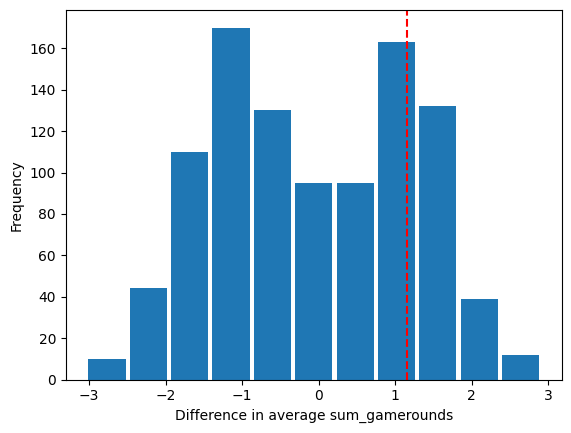

The observed difference is: 1.157488453953249
The p-value is: 0.472


In [ ]:
def permutation_resampling(x, nA, nB):
    n = nA + nB
    indeX_B = set(random.sample(range(n), nB))
    indeX_A = set(range(n)) - indeX_B
    return x.loc[list(indeX_B)].mean() - x.loc[list(indeX_A)].mean()

nA = df[df['version'] == 'gate_30']['sum_gamerounds'].count()
nB = df[df['version'] == 'gate_40']['sum_gamerounds'].count()
# permutation resampling 10000 times
diff = [permutation_resampling(df['sum_gamerounds'], nA, nB) for i in range(1000)]
# plot the histogram
plt.hist(diff, bins=11, rwidth=0.9)
plt.axvline(x=version1-version2, color='red', linestyle='--')
plt.xlabel('Difference in average sum_gamerounds')
plt.ylabel('Frequency')
plt.show()
obs_diff = df[df['version'] == 'gate_30']['sum_gamerounds'].mean() - df[df['version'] == 'gate_40']['sum_gamerounds'].mean()
p_value = sum([1 for d in diff if abs(d) >= abs(obs_diff)]) / len(diff)
print("The observed difference is:", obs_diff)
print("The p-value is:", p_value)

We are unable to reject the null hypothesis, which states that there is no difference in the mean number of game rounds between the two groups, because the p-value is higher than the traditional significance level of 0.05. Put otherwise, the observed variation is not statistically significant, and there isn't much evidence to support the idea that the version change from gate_30 to gate_40 affected how many game rounds people played.

It's crucial to remember that this conclusion is dependent on the particular test that was conducted, and that other aspects or considerations would need to be taken into account when interpreting the findings.